In [43]:
import os
import time
from tqdm import tqdm_notebook # не обязательный
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
# Делает графики удобного размера
matplotlib.rcParams['figure.figsize'] = (8, 8)
# Делает красивый грид на графиках
sns.set_style('whitegrid')

### Pandas

Для выполнения этого блока заданий вам понадобится файл <<Данные для практической работы №1>>

In [180]:
# Загрузите данные в переменную dat и выведите размер датафрейма и первые 5 строк
# здесь ваш код:

In [181]:
# Сколько пропусков в каждой из колонок (NaN) [1 балл]
# здесь ваш код:

In [51]:
# Напечатать таблицу с 2 колонками: 1 - уникальные значения quantity, 2 - сколько раз каждое такое значение встречается [1 балл]
# (выведите их отсортированными по значениям quantity в возрастающем порядке)
# здесь ваш код:

In [145]:
# Напечатать таблицу с 2 колонками: 1 - уникальные значения item_name, 2 - сколько раз каждое такое значение встречается [1 балл]
# (выведите их отсортированными по значениям встречаемости в возрастающем порядке)
# здесь ваш код:

In [146]:
# Сделайте item_price типом float  (Подсказка: надо удалить знаки $) [2 балла]
# здесь ваш код:

In [147]:
# Создайте колонку one_item_price - стоимость одной порции блюда, которая будет равна item_price/quantity [1 балл]
# здесь ваш код:

In [148]:
# Создайте датафрейм из 3 колонок: 1 - уникальные item_name, 2 - минимальная цена(one_item_price), 3 - максимальная цена(one_item_price) [2 балла]
# Отсортируйте этот датафрейм по убыванию значения максимальной цены (one_item_price)
# Сохраните полученный датафрейм в переменную dat_gr и напечатайте его первые 5 строк
# здесь ваш код:

In [150]:
# Отсортируйте dat_gr по значению разницы между максимальной и минимальной ценами в убывающем порядке [2 балла]
# здесь ваш код:

In [152]:
# Отсортируйте item_name по длине названия и выдайте 5 самых длинных названий [1 балл]
# здесь ваш код:

In [153]:
# Сколько заказов содержит ровно 1 товар? (Подсказка: заказ определяется order_id - все строки, у которых одинковый order_id - это один заказ)
# [3 балла]
# здесь ваш код:

In [154]:
# Выведите все виды буррито которые есть с количеством раз, сколько они встречались в датафрейме dat [3 балла]
# (Подсказка: во всех видах буррито присутствует слово "Burrito")
# здесь ваш код:

In [155]:
# Выведите таблицу с 2 колонками: 1 - уникальные виды буритто, 2 - их стоимости, отсортированную по убыванию стоимостей [1 балл]
# здесь ваш код:

In [156]:
# В каком количестве заказов есть товар, который составляет более 40% от стоимости всего заказа [4 балла]
# здесь ваш код:

In [157]:
# Представим, что товар [Diet Coke] (choice_description) на самом деле стоил на 15% дороже, чем написано в таблице 
# (то есть вместо 1.09 -> 1.09*1.15, 1.25 -> 1.25*1.15, 6.49 -> 6.49*1.15).
# Сколько денег прошло мимо кассы, если учесть, что продавался этот товар по новой стоимости, а чек печатался по старой [2 балла]
# здесь ваш код:

In [158]:
# Создайте датафрейм из random_matrix, удовлетворяющий следующим условиям: 
# 1) колонки датафрейма должны называться ['A', 'B', 'C', 'D', 'E']
# 2) Колонка "B" должна быть индексом
# random_matrix = np.random.randint(-5, 5, size=(15, 5))
# Сохраните полученный датафрейм на диск [1 балл]
# здесь ваш код:

### Plain python and Numpy

In [182]:
# Написать функцию, которая принимает на вход словарь: ключ - число от -3 до 5, значение - список из 4 случайных целых чисел от -5 до 5.
# На выходе функция должна должна выдать словарь, ключами которого являются уникальные значения из списков входного словаря, а значениями -
# список ключей, которые содержат данное значение. [2 балла]
# Например для словаря:
# {-3: [2, -5, -1],
#  -2: [0, 1, -1, -2],
#  -1: [3, -4, -3, -2],
#  0: [0, 3, -4],
#  1: [0, 3, -5],
#  2: [0, 4, -3],
#  3: [2, -4, -1],
#  4: [3, -4, -3, -2],
#  5: [-4, -3, -1]}
# функция должна вернуть:
# {-5: [-3, 1],
#  -4: [-1, 0, 3, 4, 5],
#  -3: [-1, 2, 4, 5],
#  -2: [-2, -1, 4],
#  -1: [-3, -2, 3, 5],
#  0: [-2, 0, 1, 2],
#  1: [-2],
#  2: [-3, 3],
#  3: [-1, 0, 1, 4],
#  4: [2]}
# сгенерировать такой словарь можно функцией: generated_dict = {i: list(set(np.random.randint(-5, 5, size=4).tolist())) for i in range(-3, 5+1)}

def inverting_func(some_dict):
    # здесь ваш код:

    return resulting_dict

In [183]:
# Написать функцию, которая подсчитывает количество ненулевый элементов на главное диагонали прямоугольной матрицы. 
## Пример:
# Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.
def my_diag_product_func(x):
    # здесь ваш код:
    
    return result

In [184]:
# Написать функцию, выдает максимальный элемент из тех, перед которым идёт ноль. Если в массиве нет нулей - выдает "В массиве нет нулей" [1 балл]
## Пример:
# Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.
def my_max_element(x):
    # здесь ваш код
    
    return result

In [185]:
# Написать функцию, которая подсчитывает матрицу евклидовых расстояний между объектами, содержащимися в матрицах X и Y. [2 балла]
# (без использования scipy.spatial.disctance.cdist)
# Матрицы X и Y размерностей число объектов x размерность пространства (число объектов в X и в Y может быть различным)
## Пример:
# Для матриц: X = np.array([[6, 6, 5],   Y = np.array([[1, 1, 0],
#                           [5, 6, 5]                  [0, 0, 1]])
#                           [5, 5, 5],
#                           [6, 6, 5],
#                           [5, 6, 5]])
# Ответ должен быть: np.array([[8.66025404, 9.38083152],
#                              [8.1240384 , 8.77496439],
#                              [7.54983444, 8.1240384 ],
#                              [8.66025404, 9.38083152],
#                              [8.1240384 , 8.77496439]])
def euc_dist_matrix(X, Y):
    # здесь ваш код:
    
    return result


### Визуализация

In [46]:
# Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.
# Изображайте на двух соседних графиках. Для этого может быть полезен subplot. [3 балла]

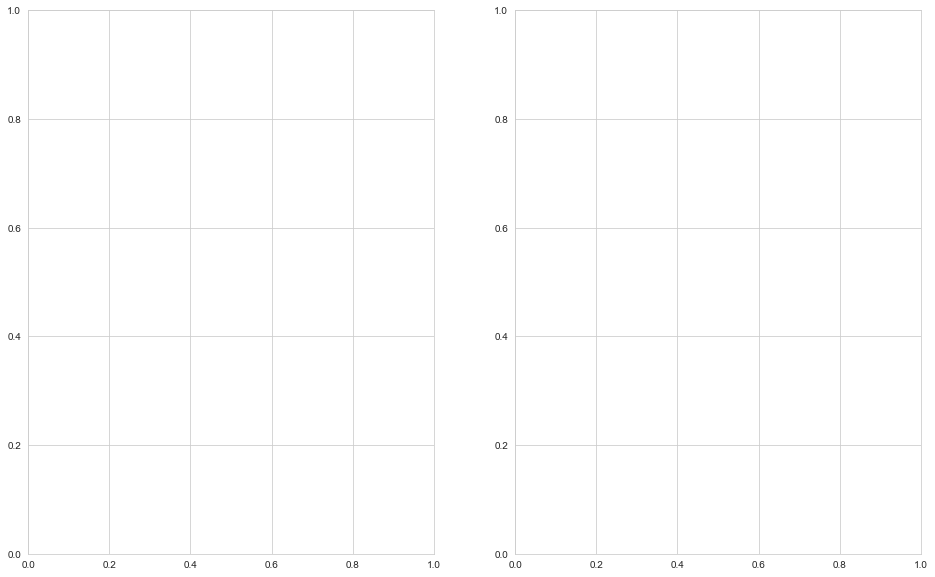

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
# здесь ваш код:


In [187]:
# Постройте график зависимости (scatterplot) item_price от quantity [0.5 балла]
# здесь ваш код:


In [188]:
# Добавьте в датафрейм dat новую колонку day_of_week - слуйчайную величину от 1 до 7. [0 баллов]
# здесь ваш код:


In [189]:
# Нарисуйте барплот. По оси икс - день недели, по оси игрек - средний чек за покупку в этот день недели. [1 балл]
# здесь ваш гарфик:


In [177]:
# Нарисуйте линейный график (plt.plot) изменения средней стоимости заказа в зависимости от order_id [1 балл]
# здесь ваш код:
